In [14]:
%matplotlib qt

In [15]:
import matplotlib as mpl
import sys
sys.path.append("/Users/yao/Smilei")
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

from matplotlib import font_manager

font_dirs = ['/Users/yao/Documents/Calibri and Cambria Fonts/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Calibri'

plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=12)

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_31734/621321092.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [26]:
wkdir = [
     # '/Users/yao/Desktop/eli_Sep05_2um/',
     # '/Users/yao/Desktop/eli_Sep05_0.8um/',
     # '/Users/yao/Desktop/eli_sep15_30nm_2D/',
     '/Users/yao/Desktop/eli_sep17_30nm_2D/',
     '/Users/yao/Desktop/eli_test',
    ]

In [27]:
S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
# S2 = happi.Open(wkdir[2], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
# S3 = happi.Open(wkdir[3], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
# S4 = happi.Open(wkdir[4], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
# S5 = happi.Open(wkdir[5], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
# S6 = happi.Open(wkdir[6], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))

I_0 = 1.5e+21 W/cm2
a_0 =  26.88270100135983
Loaded simulation '/Users/yao/Desktop/eli_sep17_30nm_2D/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics
I_0 = 1.5e+21 W/cm2
a_0 =  26.88270100135983
Loaded simulation '/Users/yao/Desktop/eli_test'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics
Scanning for new particle diagnostics


In [18]:
# prepare constants, units

me = 9.1e-31
mp = 1836.*me
qe = 1.6e-19
ep = 8.9e-12  # epsilon_0
c  = 3.0e8
wr = S0.namelist.wr
de = c / wr
Lx = S0.namelist.Lsim[0].real / 2 / np.pi      # in um
dx = Lx/S0.namelist.resx           # in mm

Te = S0.namelist.temp_e * 511.e3             # in eV
ne = 1e20 #S0.namelist.n0                              # in cm-3
ld = 7.43e2 * Te**0.5 * ne**(-0.5) * 10. # in mm
dt = S0.namelist.Tsim / S0.namelist.rest

B0 = S0.namelist.B0 * (me * wr / qe)
wc = qe * B0 / me
print("B0 = ", B0)

B0 =  20.0


In [19]:
Lx = S0.namelist.Lsim[0].real / 2 / np.pi      # in um
print("Lx = ", Lx)
Ly = S0.namelist.Lsim[1].real / 2 / np.pi      # in um
print("Ly = ", Ly)

Lx =  479.99999999999994
Ly =  160.0


In [7]:
S0.Field(0,'Ex',units=['fs','um','1/cm^3','V/m'],vsym=True).slide()

Field diagnostic #0: Ex
	Grid spacing: 0.39269908169872414, 0.39269908169872414


In [9]:
S0.ParticleBinning(0,units=['fs','um','1/cm^3','V/m'],
                   data_log=True,
                   vmin=17,
                   vmax=21,
                   cmap=newcmap).slide()


#0 - Number density of species # 1
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 1005.31 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [29]:
n0 = S0.ParticleBinning(0,units=['fs','um','1/cm^3','V/m'],
                #    data_log=True,
                   average={'y':[Ly/2.]},
                   color='red',
                  #  vmin=17,
                  #  vmax=21,
                   cmap=newcmap)#.slide()

n1 = S1.ParticleBinning(0,units=['fs','um','1/cm^3','V/m'],
                #    data_log=True,
                  #  average={'y':[Ly/2.]},
                  #  vmin=17,
                  #  vmax=21,
                  color='blue',
                   cmap=newcmap)#.slide()

happi.multiSlide(n0,n1)

In [21]:
S0.ParticleBinning(1,units=['fs','um','1/cm^3','V/m'],
                #    data_log=True,
                   vmin=17,
                   vmax=21,
                   cmap=newcmap).slide()


#1 - Number density of species # 0
    x from 0 to 3015.93 in 400 steps 
    y from 0 to 1005.31 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



Traceback (most recent call last):
  File "/Users/yao/scripts/.venv/lib/python3.12/site-packages/matplotlib/cbook.py", line 361, in process
    func(*args, **kwargs)
  File "/Users/yao/scripts/.venv/lib/python3.12/site-packages/matplotlib/backend_bases.py", line 2956, in mouse_move
    self.set_message(self._mouse_event_to_message(event))
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yao/scripts/.venv/lib/python3.12/site-packages/matplotlib/backend_bases.py", line 2948, in _mouse_event_to_message
    data_str = a.format_cursor_data(data).rstrip()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yao/scripts/.venv/lib/python3.12/site-packages/matplotlib/artist.py", line 1352, in format_cursor_data
    return self._format_cursor_data_override(data)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/yao/scripts/.venv/lib/python3.12/site-packages/matplotlib/colorizer.py", line 498, in _format_cursor_data_override
    (int(normed * n) + np.arr

In [13]:
S0.ParticleBinning(2,units=['fs','um','1/cm^3','V/m'],
                   data_log=True,
                #    vmin=17,
                #    vmax=21,
                   cmap=newcmap).slide()


#2 - Number density of species # 1
    x from 0 to 3015.93 in 400 steps 
    px from -400 to 800 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[1]



In [12]:
S0.ParticleBinning(4,units=['fs','um','1/cm^3','V/m','MeV'],data_log=True).slide()


#4 - Number density of species # 1
    ekin from 0.000195695 to 97.8474 in 5000 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [7]:
S0.ParticleBinning(5,units=['fs','um','1/cm^3','V/m','MeV'],data_log=True).slide()


#5 - Number density of species # 0
    ekin from 0.000195695 to 195.695 in 5000 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0]



In [6]:
S0.Screen(0,units=['fs','um','1/cm^3','V/m','MeV'],data_log=True).slide()


#0 - Number density of species # 0
    ekin from 0.000195695 to 195.695 in 5000 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0]



/Users/yao/Smilei/happi/_Diagnostics/Diagnostic.py:857: RuntimeWarning: divide by zero encountered in log10
  return self._np.log10( self._dataLinAtTime(t) )



#0 - Number density of species # 1
    x from 0 to 3015.93 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



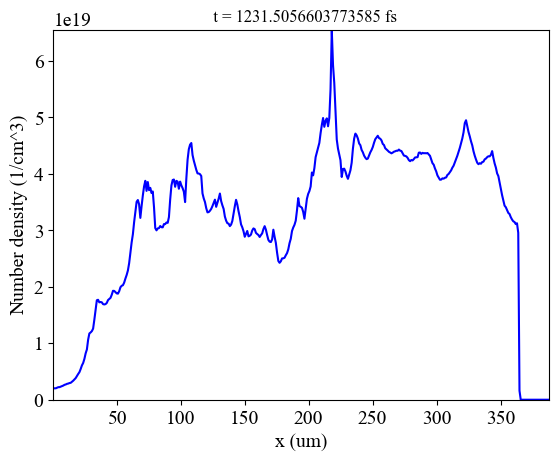

In [28]:
np0 = S0.ParticleBinning(0, units=['fs','um','1/cm^3'],
                         # data_log='True',
                         # ymin=0,ymax=32,
                         # vmin=18,vmax=24,
                         # xmin=30, xmax=70,
                         cmap=newcmap,
                         timestep_indices=[-10],
                         # subset={'y':Ly/2},
                   color='blue',
              label='30 nm',
                   ).plot()



#2 - Number density of species # 1
    x from 0 to 3015.93 in 400 steps 
    px from -400 to 800 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



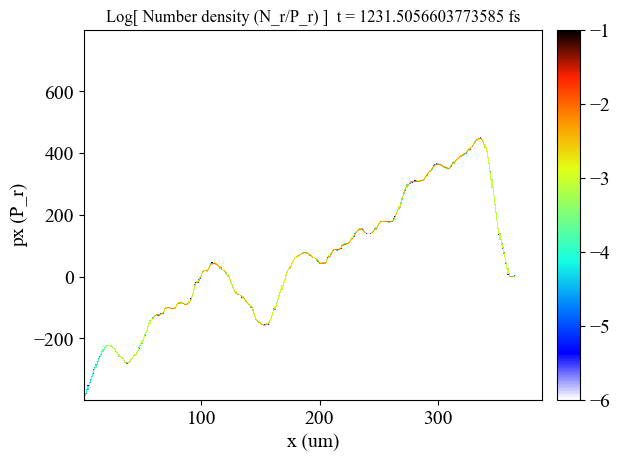

In [35]:
np0 = S0.ParticleBinning(2, units=['fs','um','1/cm^3'],
                         data_log='True',
                         # ymin=0,ymax=32,
                         vmin=-6,vmax=-1,
                         # xmin=30, xmax=70,
                         cmap=newcmap,
                         timestep_indices=[-10],
                         # subset={'y':Ly/2},
                #    color='blue',
            #   label='30 nm',
                   ).plot()


In [ ]:
## note that here we need to use the num to locate the time of about 500 fs, instead of using the last timestep.

num = -15

es0 = S0.ParticleBinning('#6', units=['fs','um','1/cm^3','MeV'],
                   data_log='True',
                   xmin=0,xmax=35,
                   timestep_indices=[num],
                #    vmin=-7,vmax=-2,
                   color='blue',
                   label='2 um',
                   linestyle='-',
                   )#.slide()

es1 = S1.ParticleBinning('#6', units=['fs','um','1/cm^3','MeV'],
                   data_log='True',
                   xmin=0,xmax=35,
                   timestep_indices=[num],
                #    vmin=-7,vmax=-2,
                   color='red',
                   label='0.8 um',
                   linestyle='--',
                   )#.slide()



happi.multiPlot(es0, es1, 
               #  es2, es3, es4, es5, es6,
                skipAnimation=True)

In [ ]:
Ex0 = S0.Field(1,'Ex',units=['fs','um','V/m'],
               vsym=5e12,
               subset={'y':Ly/2},
               # subset={'y':640},
               color='blue',
               label='2 um',
               )#.slide(figure=3)

Ex1 = S1.Field(1,'Ex',units=['fs','um','V/m'],
               vsym=5e12,
               subset={'y':Ly/2},
               # subset={'y':640},
               color='red',
               linestyle='--',
                label='0.8 um',
               )#.slide(figure=3)

Ex2 = S2.Field(1,'Ex',units=['fs','um','V/m'],
               vsym=5e12,
               subset={'y':Ly/2},
               # subset={'y':640},
               color='orange',
               linestyle=':',
                label='0.8 um, rear-plasma',
               )#.slide(figure=3)

happi.multiSlide(Ex0, Ex1, Ex2)

In [ ]:
# Phase space distribution -- protons

ps0 = S0.ParticleBinning('#3', units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-5,
                   vmax=1,
                  #  aspect=1.0,
                   xmin=50,xmax=100,
                   ymin=-200,ymax=600,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   )#.slide()

ps1 = S1.ParticleBinning('#3', units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-5,
                   vmax=1,
                  #  aspect=1.0,
                   xmin=50,xmax=100,
                   ymin=-200,ymax=600,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   )#.slide()

ps2 = S2.ParticleBinning('#3', units=['fs','um','1/cm^3'],
                   data_log='True',
                   cmap=newcmap,
                   vmin=-5,
                   vmax=1,
                  #  aspect=1.0,
                   xmin=50,xmax=100,
                   ymin=-200,ymax=600,
                   aspect='auto',
                  #  layout='tight',
                #    sum={'px':'all'}
                   )#.slide()

# ps0.set(set_layout_engine='tight')
# ps0.slide()

# happi.multiSlide(ps0, ps1, ps2, shape=(1,3))
happi.multiPlot(ps0, ps1, ps2, shape=(1,3),
                figsize=(16,5),
                # skipAnimation=True,
                movie="es.mp4",
                dpi=200,
                )

In [ ]:
np1 = np.array(S1.ParticleBinning('#1+#2', 
                                  units=['fs','um','1/cm^3'],
                                  data_log='True',
                                  ).getData()[0])

In [ ]:
np1_x = np.array(S1.ParticleBinning('#1+#2', 
                                  units=['fs','um','1/cm^3'],
                                  data_log='True',
                                  ).getAxis('x'))

In [ ]:
plt.plot(np1_x, np1[:,200])

In [ ]:
multi_den = np.loadtxt('/Users/yao/Desktop/I3e31_0.8um_500ps.csv')
multi_den2 = np.loadtxt('/Users/yao/Desktop/I1e32_0.8um_600ps.csv')
multi_den3 = np.loadtxt('/Users/yao/Desktop/I3e30_0.8um_600ps.csv')

In [ ]:
multi_den_x = multi_den[:,0] # position in um
multi_den_y = multi_den[:,1] # density in cm-3

multi_den_x2 = multi_den2[:,0] # position in um
multi_den_y2 = multi_den2[:,1] # density in cm-3

multi_den_x3 = multi_den3[:,0] # position in um
multi_den_y3 = multi_den3[:,1] # density in cm-3

In [ ]:
plt.plot(-(multi_den_x-30.5), np.log10(multi_den_y),'--',color='blue',label='MULTI@3e14')
plt.plot(-(multi_den_x2-3), np.log10(multi_den_y2),':',color='cyan',label='MULTI@1e15')
plt.plot(-(multi_den_x3-54), np.log10(multi_den_y3),'-.',color='green',label='MULTI@3e13')
plt.plot(np1_x, np1[:,200],'-',color='red',label='Smilei',linewidth=2)
plt.xlim(60,70)
plt.xlabel('Position (um)')
plt.ylabel('log10(Density) (cm$^{-3}$)')
plt.ylim(18,24)
plt.grid(alpha=0.5, linestyle='--')
plt.legend()

In [ ]:
# load data from MULTI for the 30 nm target density distribution

multi_den = np.loadtxt('/Users/yao/Documents/Data/ELI2025/ELI_Al_400ps_preplasma/ne_Al30nm_3e14Wcm-2_500ps.csv')
multi_den_x = multi_den[:,0] # position in um
multi_den_y = multi_den[:,1] # density in cm-3

In [ ]:
# load data from SMILEI for the 30 nm target density distribution

S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.0*np.pi*3e8/(0.810*1e-6))
smilei_den   = np.array(S0.ParticleBinning(1,units=['1/cm^3']).getData()[0])
smilei_den_x = np.array(S0.ParticleBinning(1,units=['um']).getAxis('x'))

In [ ]:
plt.plot(-(multi_den_x-265), (multi_den_y),'-',color='green',label='Multi')
plt.plot(smilei_den_x, smilei_den,'--',color='red',label='Smilei',linewidth=2)
plt.xlim(0,400)
plt.xlabel('Position (um)')
plt.ylabel('Electron Density (cm$^{-3}$)')
plt.ylim(3e19,4.3e19)
plt.grid(alpha=0.5, linestyle='--')
plt.legend()
plt.savefig('/Users/yao/Desktop/eli_30nm_density_compare.png', dpi=300)

In [ ]:
multi_den.shape

In [6]:
#load electron spectra data

# shot 105, 30 nm SiN
ene105 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene105.txt') # 30 nm SiN
num105 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num105.txt')

# shot 102, 150 nm SiN
ene102 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene102.txt') # 150 nm SiN
num102 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num102.txt')

# shot80-81, 2 um Au
ene8081 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene8081.txt') # 2 um Au
num8081 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num8081.txt')

# shot78-79, 3 um Au
ene7879 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene7879.txt') # 3 um Au
num7879 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num7879.txt')

# shot72-73, 10 um Au
ene7273 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene7273.txt') # 10 um Au
num7273 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num7273.txt')

# shot 74-75, 25 um W
ene7475 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene7475.txt') # 25 um W
num7475 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num7475.txt')

# shot 76-77, 50 um Au
ene7677 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/ene7677.txt') # 50 um Au
num7677 = np.loadtxt('/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/e_spectra/num7677.txt')



In [10]:
# nume0 = np.array(S0.Screen(0, units=['fs','um','1/cm^3','MeV'],).getData()[-1])
# ekine0 = np.array(S0.Screen(0, units=['fs','um','1/cm^3','MeV'],).getAxis('ekin'))

nume0 = np.array(S0.ParticleBinning(5, units=['fs','um','1/cm^3','MeV'],).getData()[-1])
ekine0 = np.array(S0.ParticleBinning(5, units=['fs','um','1/cm^3','MeV'],).getAxis('ekin'))

In [6]:
# Set font to Calibri and increase font sizes
plt.rcParams.update({
    'font.family': 'Calibri',
    'font.size': 24,
    'axes.titlesize': 28,
    'axes.labelsize': 24,
    'legend.fontsize': 16,
    'xtick.labelsize': 24,
    'ytick.labelsize': 24
})

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(ene105, num105, linestyle='-', color='red', label="#105, 30 nm")
plt.plot(ene102, num102, linestyle='-', color='blue', label="#102, 150 nm")
plt.plot(ene8081, num8081, linestyle='-', color='green', label="#80-81, 2 um Au")
plt.plot(ene7879, num7879, linestyle='-', color='orange', label="#78-79, 3 um Au")
plt.plot(ene7273, num7273, linestyle='-', color='purple', label="#72-73, 10 um Au")
plt.plot(ene7475, num7475, linestyle='-', color='brown', label="#74-75, 25 um W")
plt.plot(ene7677, num7677, linestyle='-', color='black', label="#76-77, 50 um Au")
# plt.title("Gray Value vs Distance")
plt.xlabel("Energy (MeV)")
plt.ylabel("dN/dE (a.u.)")
plt.legend()
# plt.grid(True)
plt.yscale('log')
plt.tight_layout()

plt.xlim(0, 60)
plt.ylim(1e8, 2e11)
plt.show()

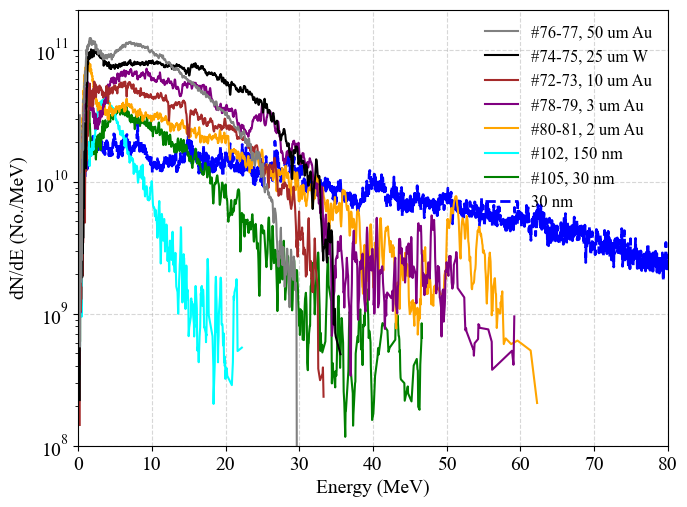

In [13]:
width  = 3.487 * 2
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

factor = 1e14

ax.plot(ekine0[::2], nume0[::2]*factor,
        linestyle='--', 
        # marker='^', markersize=8, 
        color='blue',
        linewidth=2,
        label='30 nm')

# ax.plot(ekine1[::2], nume1[::2]*factor,
#         linestyle='--', 
#         # marker='^', markersize=8, 
#         color='red',
#         linewidth=2,
#         label='24 um')

ax.set_yscale('log')

ax.plot(ene105, num105, linestyle='-', color='green', label="#105, 30 nm")
ax.plot(ene102, num102, linestyle='-', color='cyan', label="#102, 150 nm")
ax.plot(ene8081, num8081, linestyle='-', color='orange', label="#80-81, 2 um Au")
ax.plot(ene7879, num7879, linestyle='-', color='purple', label="#78-79, 3 um Au")
ax.plot(ene7273, num7273, linestyle='-', color='brown', label="#72-73, 10 um Au")
ax.plot(ene7475, num7475, linestyle='-', color='black', label="#74-75, 25 um W")
ax.plot(ene7677, num7677, linestyle='-', color='grey', label="#76-77, 50 um Au")


# plt.xlim(0, 60)
# plt.ylim(1e8, 2e11)



ax.set_xlim([0,80])
ax.set_ylim([1e8,2e11])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('dN/dE (No./MeV)')
ax.legend(fancybox=False, reverse=True, frameon=False, fontsize=12)
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()

# plt.savefig("/Users/yao/Desktop/e_spectra.pdf", dpi=300, bbox_inches='tight')



In [14]:
# check the protons

# load ELI new data

filedir = "/Users/yao/Nextcloud/PROJECTS/ELI/Xray-April2025/proton_spectra/"

shot20 = np.loadtxt(filedir+"shot20_10um_Au/DN_DE_20.txt")      # Update this path if necessary
shot16 = np.loadtxt(filedir+"shot16_30nm_SiN/DN_DE_16.txt")  # Update this path if necessary
shot17 = np.loadtxt(filedir+"shot17_150nm_SiN/DN_DE_17.txt")  # Update this path if necessary
shot43 = np.loadtxt(filedir+"shot43_500nm_SiN/DN_DE_43.txt")      # Update this path if necessary

# get rid of the clearly missed RCF layer data on 04/05/2025
shot16 = np.delete(shot16, 7, axis=0)
shot20 = np.delete(shot20, 7, axis=0)

In [29]:
# load simulation data

num0 = np.array(S0.ParticleBinning(4, units=['fs','um','1/cm^3','MeV'],).getData()[-10])
ekin0 = np.array(S0.ParticleBinning(4, units=['fs','um','1/cm^3','MeV'],).getAxis('ekin'))

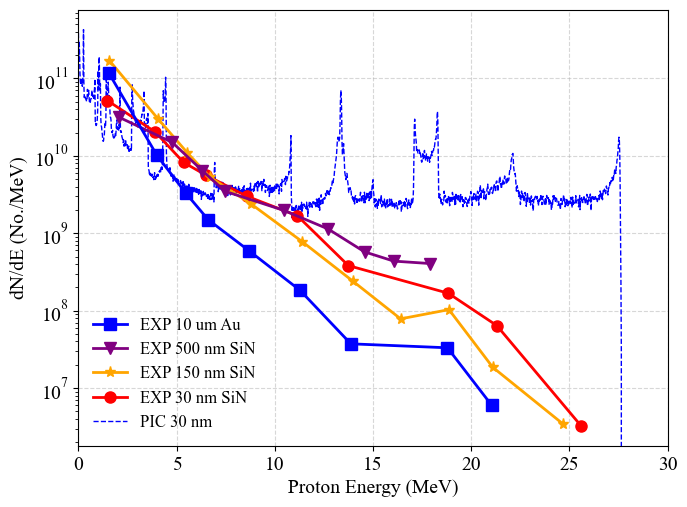

In [31]:
width  = 3.487 * 2
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.plot(ekin0[::2], num0[::2]*3e13,
        linestyle='--', 
        # marker='^', markersize=8, 
        color='blue',
        linewidth=1,
        label='PIC 30 nm')

ax.set_yscale('log')

ax.plot(shot16[:,1], shot16[:,0],
        linestyle='-', marker='o', markersize=8, color='red',
        linewidth=2,
        label='EXP 30 nm SiN')

ax.plot(shot17[:,1], shot17[:,0],
        linestyle='-', marker='*', markersize=8, color='orange',
        linewidth=2,
        label='EXP 150 nm SiN')

ax.plot(shot43[:,1], shot43[:,0],
        linestyle='-', marker='v', markersize=8, color='purple',
        linewidth=2,
        label='EXP 500 nm SiN')


ax.plot(shot20[:,1], shot20[:,0],
        linestyle='-', marker='s', markersize=8, color='blue',
        linewidth=2,
        label='EXP 10 um Au')



ax.set_xlim([0,30])
# ax.set_ylim([1e6,1e12])
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('Proton Energy (MeV)')
ax.set_ylabel('dN/dE (No./MeV)')
ax.legend(fancybox=False, reverse=True, frameon=False)
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()

# plt.savefig("/Users/yao/Desktop/energy_spectra.png", dpi=300, bbox_inches='tight')

